In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy import stats
from pandas import Series, DataFrame

health_issue_df = pd.read_csv('health_concern_countries.csv')

In [2]:
#clearing the data
health_issue_df.dropna(inplace = True)
health_issue_df = health_issue_df[1:]
health_issue_df.reset_index(inplace = True)  
health_issue_df.rename(columns = {'level_0' : 'Country', 'level_1' : 'Diagnosis', 'level_2' : 'Prevention', 'level_3' : 'Symptoms', 'level_4' : 'Diseases', 'level_5' : 'IMDBRating', 'Category: Health' : 'Treatment'}, inplace = True)

health_issue_df.Diagnosis = health_issue_df.Diagnosis.str[:-1].astype(int)
health_issue_df.Prevention = health_issue_df.Prevention.str[:-1].astype(int)
health_issue_df.Symptoms =health_issue_df.Symptoms.str[:-1].astype(int)
health_issue_df.Diseases =health_issue_df.Diseases.str[:-1].astype(int)
health_issue_df.Treatment =health_issue_df.Treatment.str[:-1].astype(int)

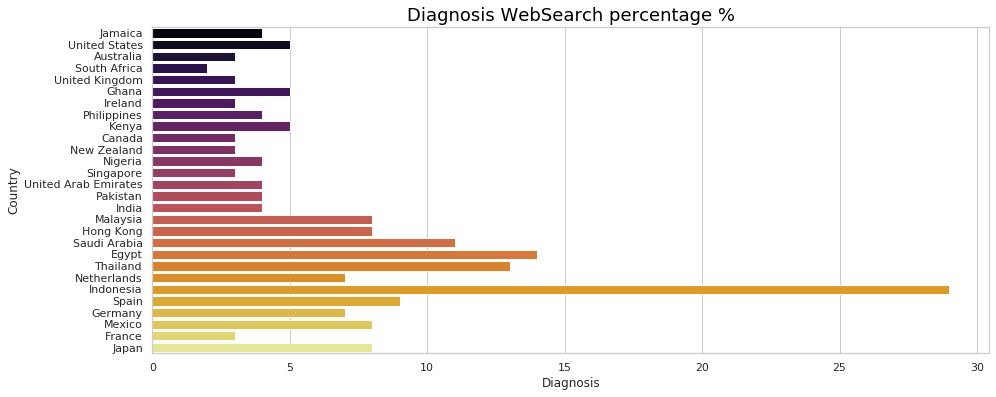

In [3]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 6))

sns.barplot(x = 'Diagnosis', y = 'Country', palette = 'inferno', data = health_issue_df)

plt.title('Diagnosis WebSearch percentage %', color = 'black', fontsize = 18)

plt.savefig('diagnosis_search%.png')

Diagnosis WebSearch percentage % per Country Barplot

- Percentages are really low, most of them under 15%
- Indonesia is the peak country which searches for diagnosis online.
- South Africa is the least country on the ranking.

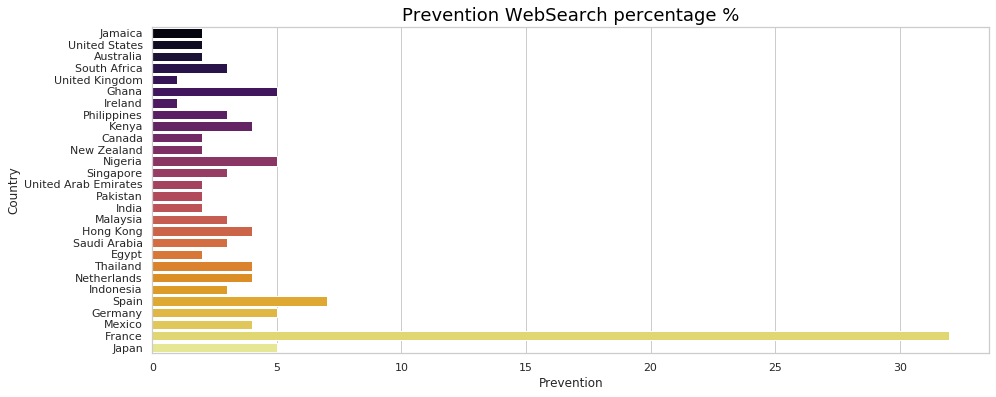

In [4]:
plt.figure(figsize=(15, 6))

sns.barplot(x = 'Prevention', y = 'Country', palette = 'inferno', data = health_issue_df)

plt.title('Prevention WebSearch percentage %', color = 'black', fontsize = 18)

plt.savefig('prevention_search%.png')

Prevention WebSearch percentage % per Country Barplot

- Percentages are really low, most of them under 7%, that is, sad fact because prevention is more important in order to be healthier.
- France, is by far the first country on the list with a high divergence from the other, thus french people are looking for ways to prevent health issues to arise.
- Surprisingly, two Europe continent countries hit the last place, UK and Ireland. Note that UK and Ireland used to be the same country back in the years, hence, they might share the same mentality.



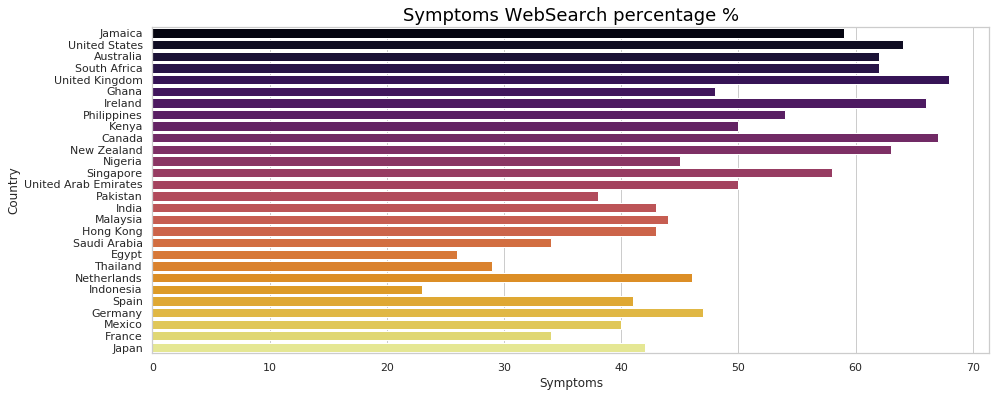

In [5]:
plt.figure(figsize=(15, 6))

sns.barplot(x = 'Symptoms', y = 'Country', palette = 'inferno', data = health_issue_df)

plt.title('Symptoms WebSearch percentage %', color = 'black', fontsize = 18)

plt.savefig('Symptoms_search%.png')

Symptoms WebSearch percentage % per Country Barplot

- Percentages are really high, there is a tendency for checking symptoms for health issues.
- UK in this plot comes first, with a small deviance from Canada and Ireland. Again, UK and Ireland share the same attitude towards health concerns.
- Indonesia is the last country that checks for symptoms.

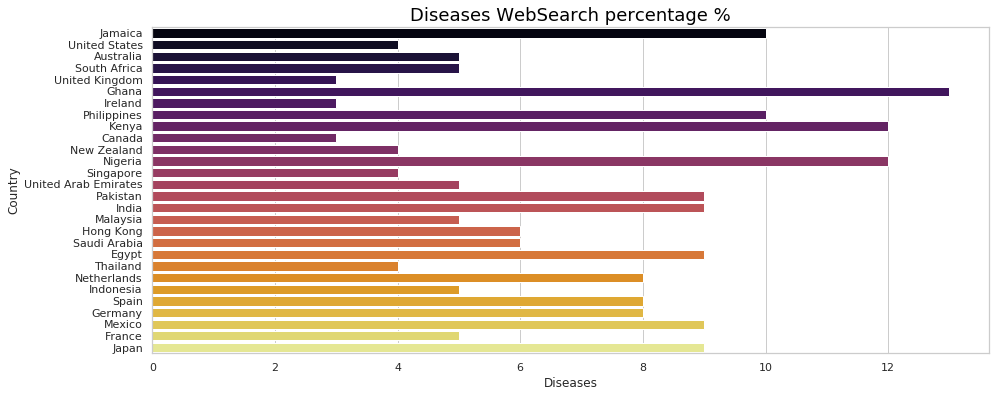

In [6]:
plt.figure(figsize=(15, 6))

sns.barplot(x = 'Diseases', y = 'Country', palette = 'inferno', data = health_issue_df)

plt.title('Diseases WebSearch percentage %', color = 'black', fontsize = 18)

plt.savefig('Diseases_search%.png')

Diseases WebSearch percentage % per Country Barplot

- The percentages are ranging from 3% - 13%.
- Ghana, Kenya and Nigeria (three Africa continent countries) have the first three positions in the "diseases" race. 
- UK, Ireland, Canada (again) are the last three countries in the list.

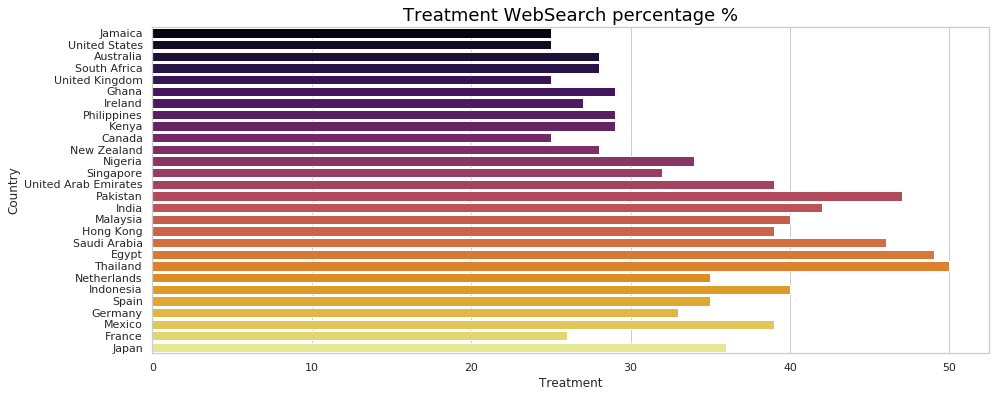

In [7]:
plt.figure(figsize=(15, 6))

sns.barplot(x = 'Treatment', y = 'Country', palette = 'inferno', data = health_issue_df)

plt.title('Treatment WebSearch percentage %', color = 'black', fontsize = 18)

plt.savefig('Treatment_search%.png')

Treatment WebSearch percentage % per Country Barplot

- Rates are moderate, they scale from 25% - 50% 
- Thailand searches more about treatment solutions on the web, with Egypt coming second and Pakistan third.
- Lowest rates on treatment searches have Jamaica, USA, UK, Canada.

In [8]:
#refactoring our DataFrame so as to make other plots --> health_issue_df2
health_issue_df2 = pd.melt(health_issue_df, id_vars = 'Country', var_name = 'Key Search', value_name = 'Search %')

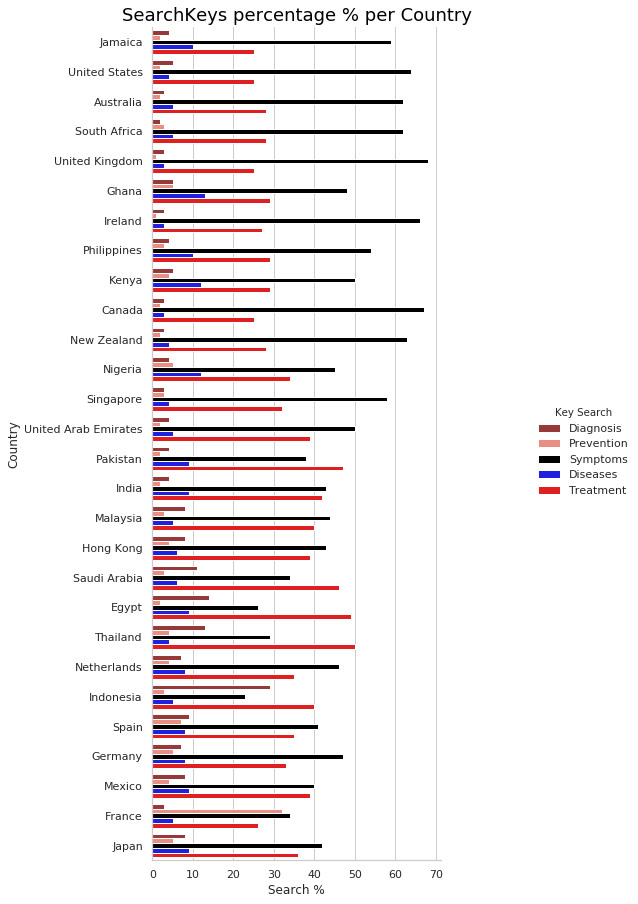

In [9]:
colors = ['brown', 'salmon', 'black', 'blue', 'red']
palette = sns.color_palette(colors)

g = sns.catplot(x = 'Search %', y = 'Country', hue = 'Key Search', data = health_issue_df2, palette = palette, kind = 'bar')
g.fig.set_figwidth(12)
g.fig.set_figheight(14)
plt.title('SearchKeys percentage % per Country', color = 'black', fontsize = 18)

plt.savefig('searchKeys%_percountry_catplot.png')

SearchKeys percentage % per Country Barplot

- UK's, Ireland's and Canada's searches are similar. They are the top-3 of symptoms searches countries and they rank the last-3 in prevention, diseases and treatment. They have identical profile towards the way they use the web for their health concerns, that is they are worried to check if they have any symptoms rather than find ways to prevent them, or get to know in general the diseases that exist. Moreover, they are not looking for treatments online.
- Indonesia on the other hand, is the country that mostly seeks diagnosis via internet and is the last country that cares about the symptoms. They try to use web as their "home doctor". It seems that they do not get worried when they have symptoms until it is high time to figure out what they have.
- Thailand, Egypt and Pakistan are the top countries for the treatment search. They look for therapies through the internet. Reasons might be that they cannot afford a doctor diagnosis, that is why also their ratings on diagnois keysearch is moderate to high comperatively with other countries.
- Note that, the only country that cares about preventing a health issue is France, which shows a rightful mindset towards health concerns.

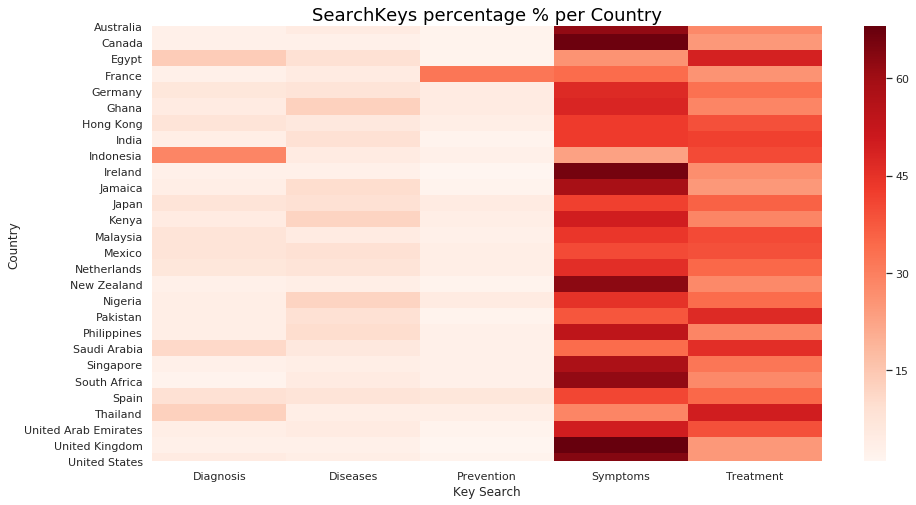

In [10]:
plt.figure(figsize=(15, 8))

a = health_issue_df2.pivot('Country', 'Key Search', 'Search %')
sns.heatmap(a, cmap='Reds')

plt.title('SearchKeys percentage % per Country', color = 'black', fontsize = 18)

plt.savefig('countries_keysearch%_heatmap.png')

SearchKeys percentage % per Country Heatmap

Heatmap visualizes in a better way our statements that we mentioned above

- Symptoms is the most popular search key as see for many countries
- Prevention is the word that is the least popular.

In [11]:
#refactoring our DataFrame so as to make other plots --> health_issue_df3
health_issue_df3 = health_issue_df.sum()
health_issue_df3 = health_issue_df3[1:]
health_issue_df3 = pd.DataFrame(health_issue_df3)
health_issue_df3.reset_index(inplace = True)  
health_issue_df3.rename(columns = {'index':'Key Search', 0: 'Search %'}, inplace = True)
health_issue_df3['Search %'] = health_issue_df3['Search %']/len(health_issue_df)

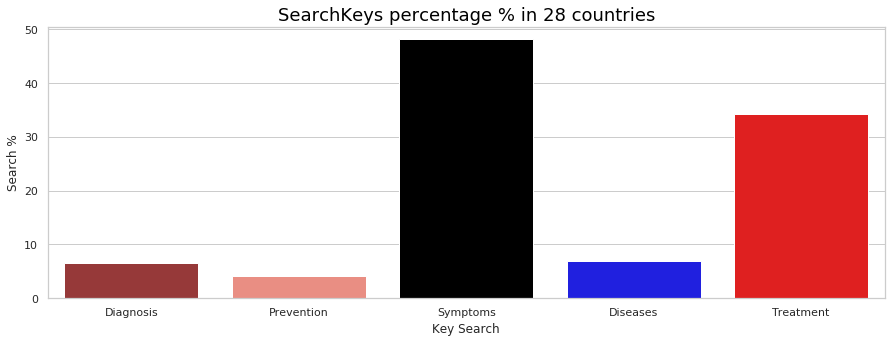

In [12]:
plt.figure(figsize=(15, 5))

sns.barplot(x = 'Key Search', y = 'Search %', palette = palette, data = health_issue_df3 )

plt.title('SearchKeys percentage % in 28 countries', color = 'black', fontsize = 18)

plt.savefig('28countries_searchkeys%_barplot.png')

SearchKeys percentage % in 28 countries Barplot

- Symptoms in all countries is the most popular search with almost 50% rate.
- Treatment comes second.
- Diagnosis and diseases share the third place.
- Prevention comes last.

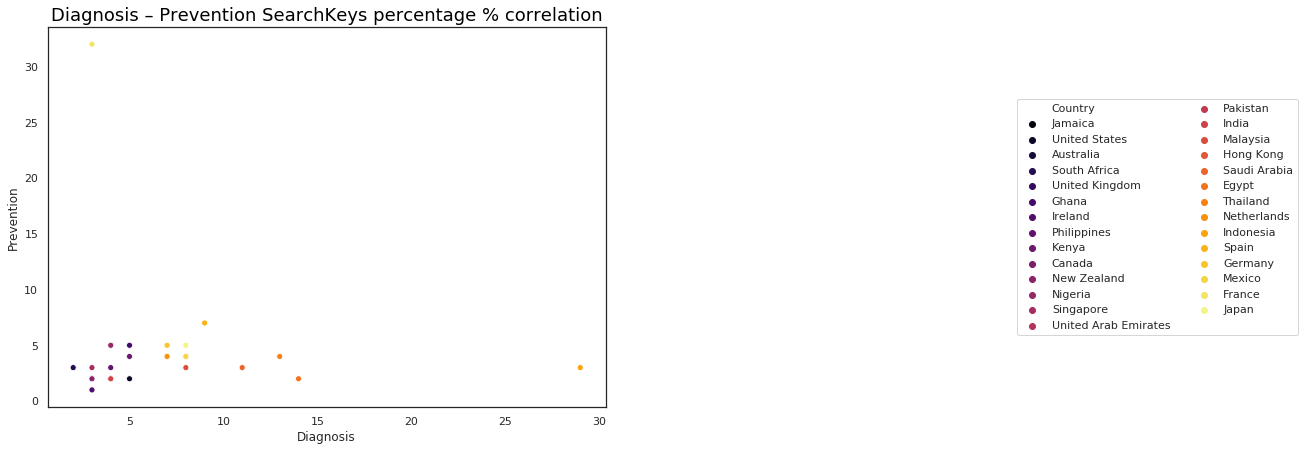

In [13]:
plt.figure(figsize=(10, 7))
sns.set(style = 'white')

g = sns.scatterplot(x = 'Diagnosis', y = 'Prevention', hue = 'Country', palette = 'inferno', data = health_issue_df)
g.legend(loc = 'center right', bbox_to_anchor = (2.25, 0.5), ncol = 2)

plt.title('Diagnosis – Prevention SearchKeys percentage % correlation', color = 'black', fontsize = 18)

plt.savefig('diagnosis_prevention%_scatterplot.png')

Diagnosis – Prevention SearchKeys percentage % Scatterplot

- There is a positive linear correlation between diagnosis and prevention search keys.
- Data points are clustered in the left down corner, thus, percentages are low, but still correlated.

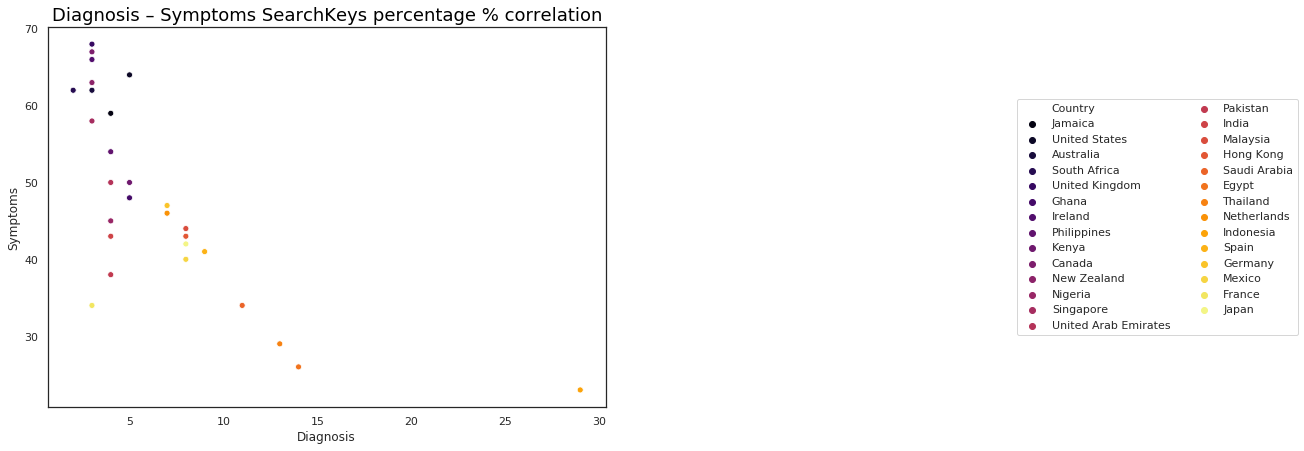

In [14]:
plt.figure(figsize=(10, 7))
g = sns.scatterplot(x = 'Diagnosis', y = 'Symptoms', hue = 'Country', palette = 'inferno', data = health_issue_df)
g.legend(loc = 'center right', bbox_to_anchor = (2.25, 0.5), ncol = 2)

plt.title('Diagnosis – Symptoms SearchKeys percentage % correlation', color = 'black', fontsize = 18)

plt.savefig('diagnosis_symptoms%_scatterplot.png')

Diagnosis – Symptoms SearchKeys percentage % Scatterplot

- There is a negative linear correlation between them.
- As diagnosis rate increases, symptoms rate decreases.

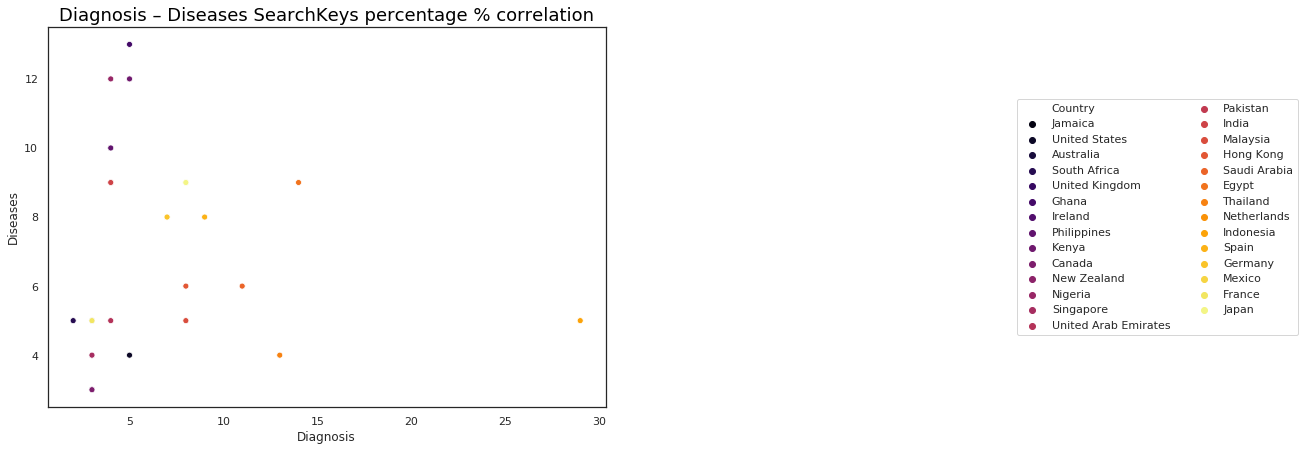

In [15]:
plt.figure(figsize=(10, 7))
g = sns.scatterplot(x = 'Diagnosis', y = 'Diseases', hue = 'Country', palette = 'inferno', data = health_issue_df)
g.legend(loc = 'center right', bbox_to_anchor = (2.25, 0.5), ncol = 2)

plt.title('Diagnosis – Diseases SearchKeys percentage % correlation', color = 'black', fontsize = 18)

plt.savefig('diagnosis_diseases%_scatterplot.png')

Diagnosis – Diseases SearchKeys percentage % Scatterplot

- It seems that there is no correlation.

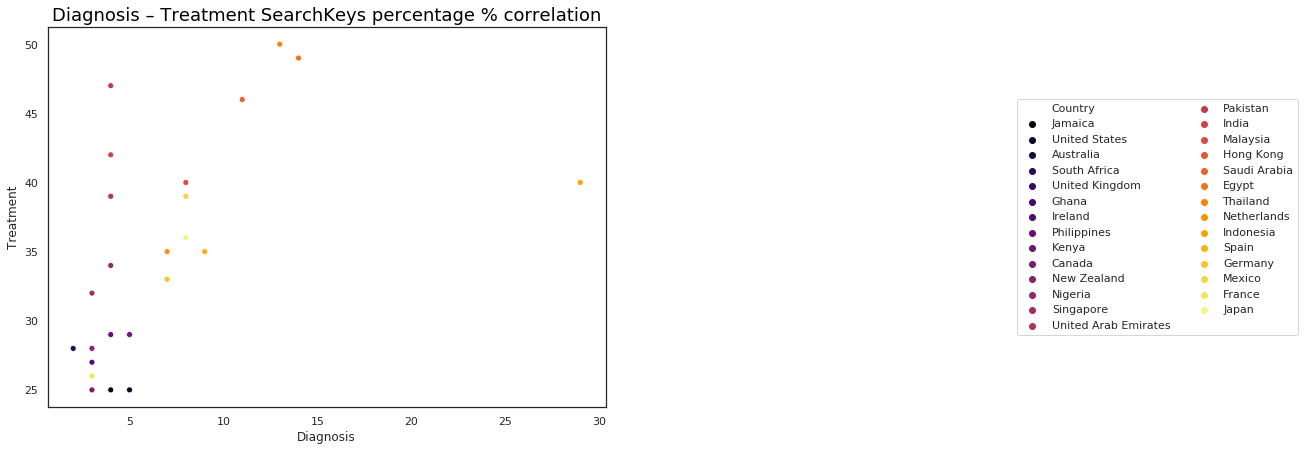

In [16]:
plt.figure(figsize=(10, 7))
g = sns.scatterplot(x = 'Diagnosis', y = 'Treatment', hue = 'Country', palette = 'inferno', data = health_issue_df)
g.legend(loc = 'center right', bbox_to_anchor = (2.25, 0.5), ncol = 2)

plt.title('Diagnosis – Treatment SearchKeys percentage % correlation', color = 'black', fontsize = 18)

plt.savefig('diagnosis_treatment%_scatterplot.png')

Diagnosis – Treatment SearchKeys percentage % Scatterplot

- It seems that there is somehow a positive correlation between them but sparse.

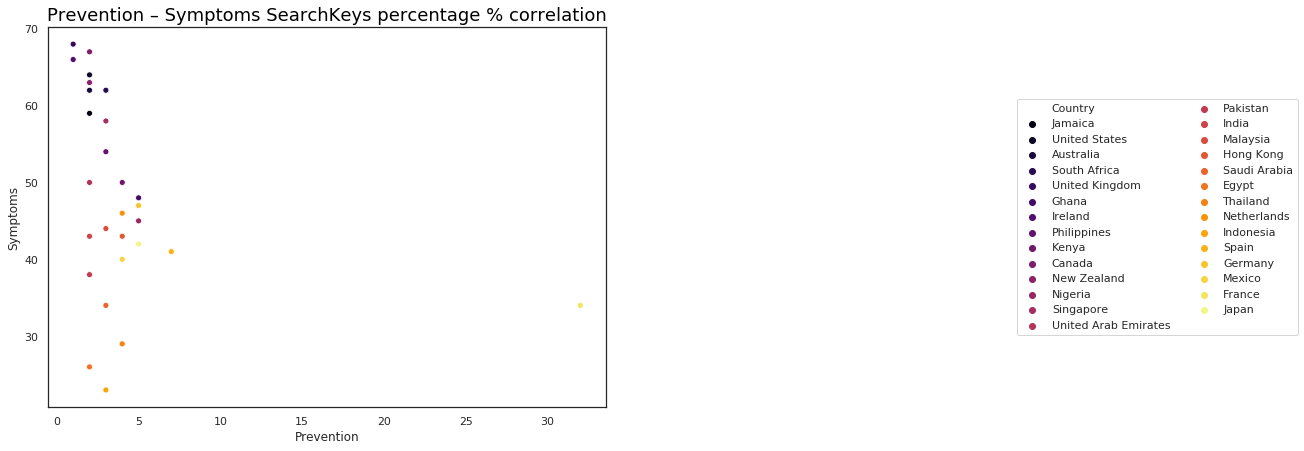

In [17]:
plt.figure(figsize=(10, 7))
g = sns.scatterplot(x = 'Prevention', y = 'Symptoms', hue = 'Country', palette = 'inferno', data = health_issue_df)
g.legend(loc = 'center right', bbox_to_anchor = (2.25, 0.5), ncol = 2)

plt.title('Prevention – Symptoms SearchKeys percentage % correlation', color = 'black', fontsize = 18)

plt.savefig('prevention_symptoms%_scatterplot.png')

Prevention – Symptoms SearchKeys percentage % Scatterplot

- There is a negative steep correlation.
- As prevention rates increases, symptoms rate search falls.

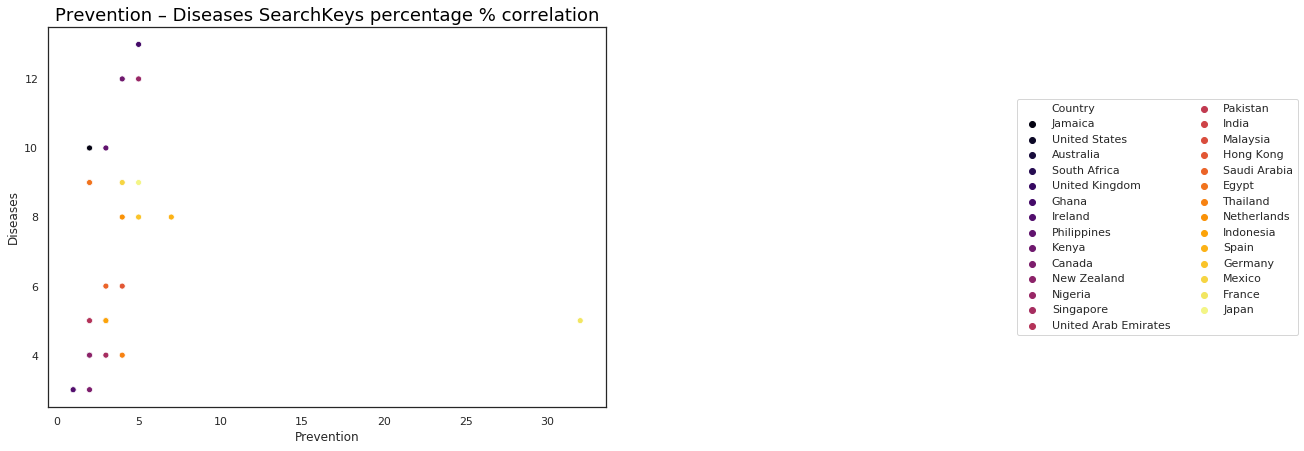

In [18]:
plt.figure(figsize=(10, 7))
g = sns.scatterplot(x = 'Prevention', y = 'Diseases', hue = 'Country', palette = 'inferno', data = health_issue_df)
g.legend(loc = 'center right', bbox_to_anchor = (2.25, 0.5), ncol = 2)

plt.title('Prevention – Diseases SearchKeys percentage % correlation', color = 'black', fontsize = 18)

plt.savefig('prevention_diseases%_scatterplot.png')

Prevention – Diseases SearchKeys percentage % Scatterplot

- There is no correlation.
- However, if we take a careful look, there are pair of countries that share the same level of rates for diseases searchkey.

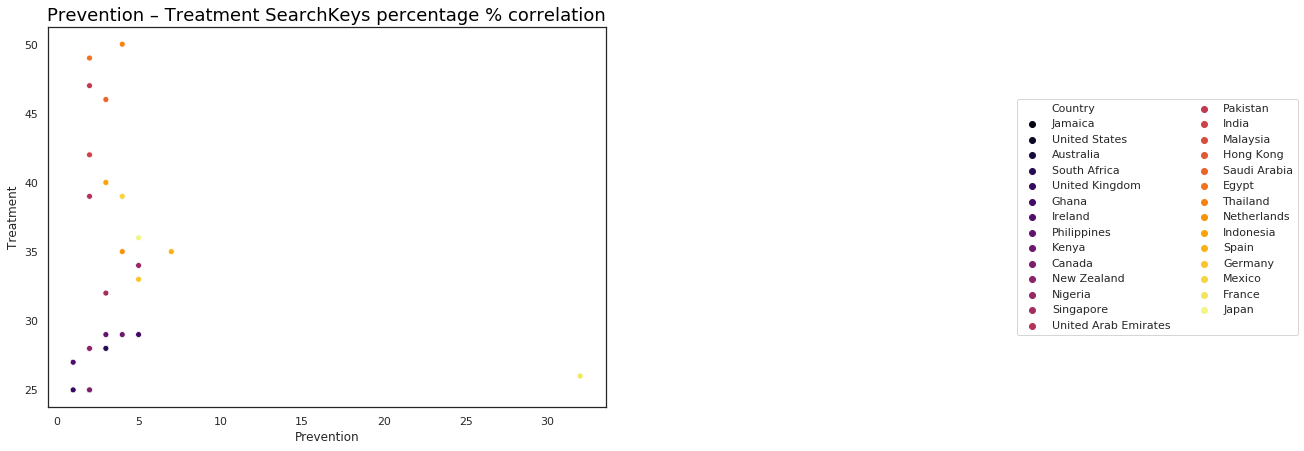

In [19]:
plt.figure(figsize=(10, 7))
g = sns.scatterplot(x = 'Prevention', y = 'Treatment', hue = 'Country', palette = 'inferno', data = health_issue_df)
g.legend(loc = 'center right', bbox_to_anchor = (2.25, 0.5), ncol = 2)

plt.title('Prevention – Treatment SearchKeys percentage % correlation', color = 'black', fontsize = 18)

plt.savefig('prevention_treatment%_scatterplot.png')

Prevention – Treatment SearchKeys percentage % Scatterplot

- It seems that there is no correlation.

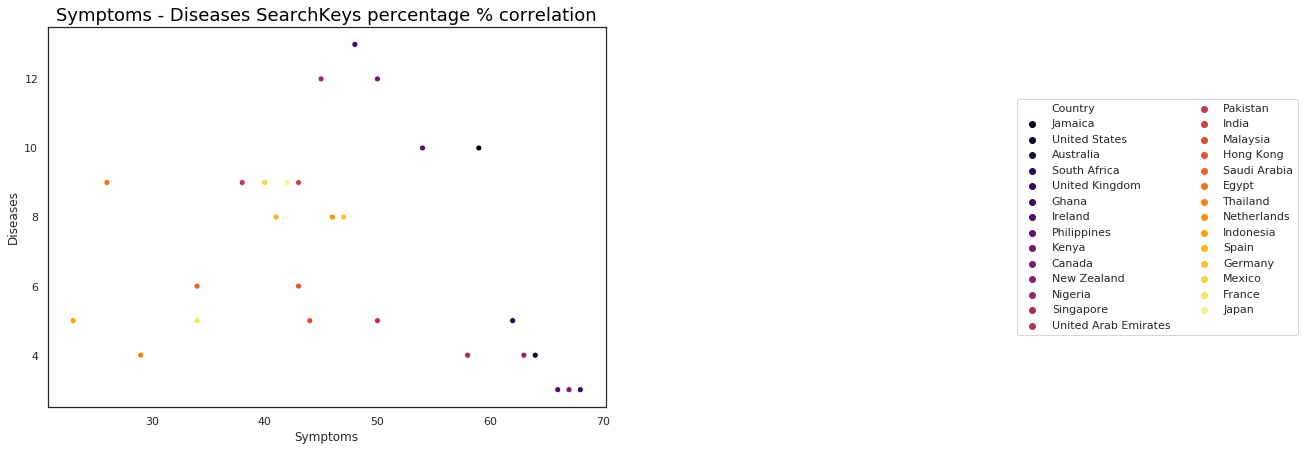

In [20]:
plt.figure(figsize=(10, 7))
g = sns.scatterplot(x = 'Symptoms', y = 'Diseases', hue = 'Country', palette = 'inferno', data = health_issue_df)
g.legend(loc = 'center right', bbox_to_anchor = (2.25, 0.5), ncol = 2)

plt.title('Symptoms - Diseases SearchKeys percentage % correlation', color = 'black', fontsize = 18)

plt.savefig('symptoms_diseases%_scatterplot.png')

Symptoms – Diseases SearchKeys percentage % Scatterplot

- It seems that there is no correlation.

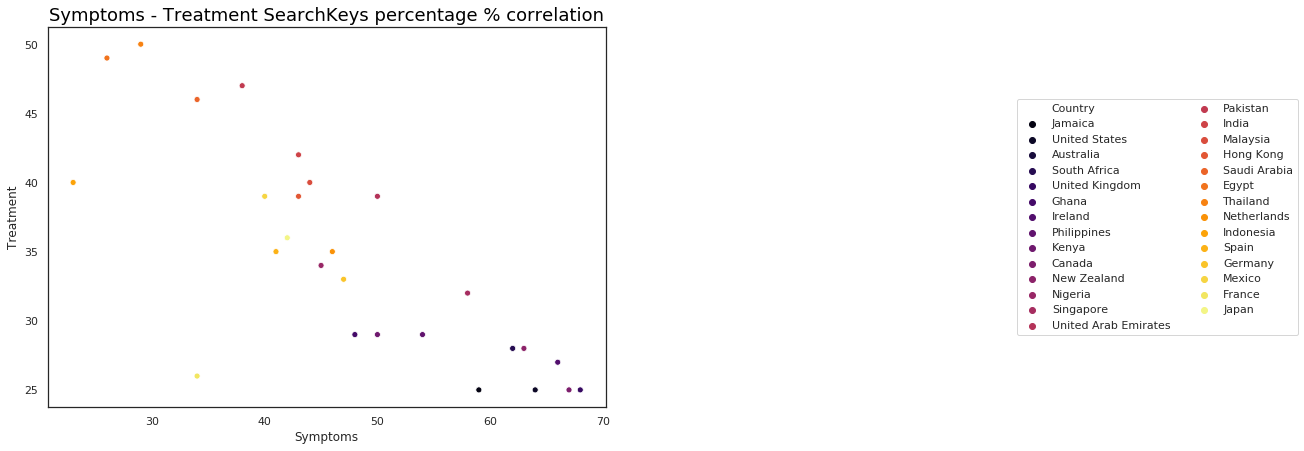

In [21]:
plt.figure(figsize=(10, 7))
g = sns.scatterplot(x = 'Symptoms', y = 'Treatment', hue = 'Country', palette = 'inferno', data = health_issue_df)
g.legend(loc = 'center right', bbox_to_anchor = (2.25, 0.5), ncol = 2)

plt.title('Symptoms - Treatment SearchKeys percentage % correlation', color = 'black', fontsize = 18)

plt.savefig('symptoms_treatment%_scatterplot.png')

Symptoms - Treatment SearchKeys percentage % Scatterplot

- There is a strong negative linear correlation.
- Those who look for treatment they are not searching for symptoms.

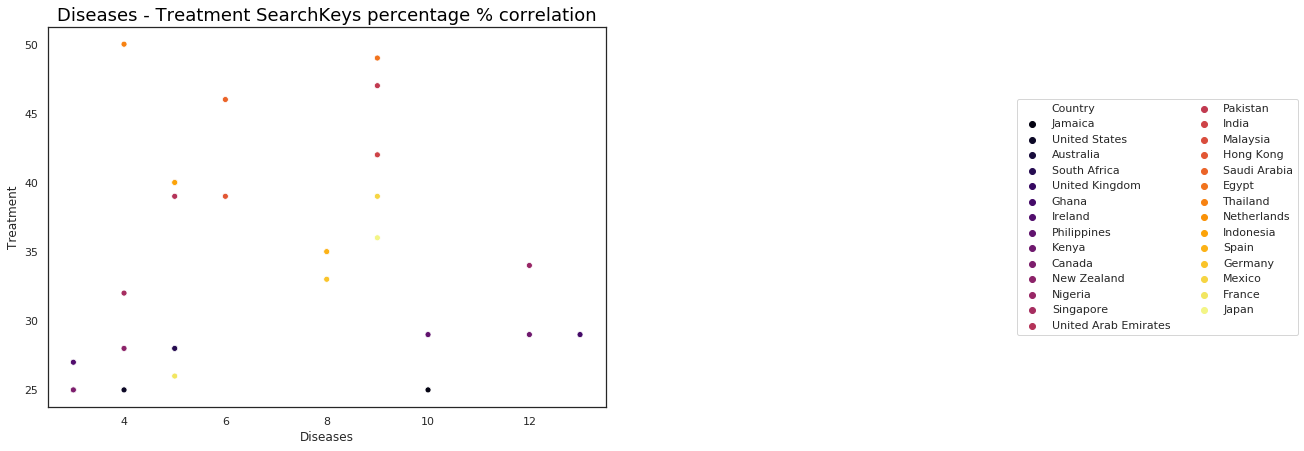

In [22]:
plt.figure(figsize=(10, 7))
g = sns.scatterplot(x = 'Diseases', y = 'Treatment', hue = 'Country', palette = 'inferno', data = health_issue_df)
g.legend(loc = 'center right', bbox_to_anchor = (2.25, 0.5), ncol = 2)

plt.title('Diseases - Treatment SearchKeys percentage % correlation', color = 'black', fontsize = 18)

plt.savefig('diseases_treatment%_scatterplot.png')

Diseases - Treatment SearchKeys percentage % Scatterplot

- It seems that there is no correlation.

In [23]:
#Pearson Correlation Coefficient
health_issue_df.corr(method = 'pearson')

,Diagnosis,Prevention,Symptoms,Diseases,Treatment
Diagnosis,1.000000,-0.073960,-0.721034,-0.016840,0.549346
Prevention,-0.073960,1.000000,-0.310900,0.005633,-0.163557
Symptoms,-0.721034,-0.310900,1.000000,-0.307983,-0.799743
Diseases,-0.016840,0.005633,-0.307983,1.000000,0.133249
Treatment,0.549346,-0.163557,-0.799743,0.133249,1.000000


In [24]:
#Spearman Correlation Coefficient
health_issue_df.corr(method = 'spearman')

,Diagnosis,Prevention,Symptoms,Diseases,Treatment
Diagnosis,1.000000,0.400112,-0.744309,0.330904,0.709854
Prevention,0.400112,1.000000,-0.501147,0.443284,0.205604
Symptoms,-0.744309,-0.501147,1.000000,-0.377302,-0.816212
Diseases,0.330904,0.443284,-0.377302,1.000000,0.286078
Treatment,0.709854,0.205604,-0.816212,0.286078,1.000000
